In [10]:
#import necessary libraries
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split


In [11]:
# Load Olivetti faces dataset
faces = fetch_olivetti_faces()

# Split dataset into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    faces.data, faces.target, test_size=0.2, random_state=42, stratify=faces.target
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)


In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [13]:
# Perform K-Means clustering with a range of cluster numbers
k_values = range(2, 21)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)


/Users/rahulkandel/anaconda3/envs/itech7001/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rahulkandel/anaconda3/envs/itech7001/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rahulkandel/anaconda3/envs/itech7001/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rahulkandel/anaconda3/envs/itech7001/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

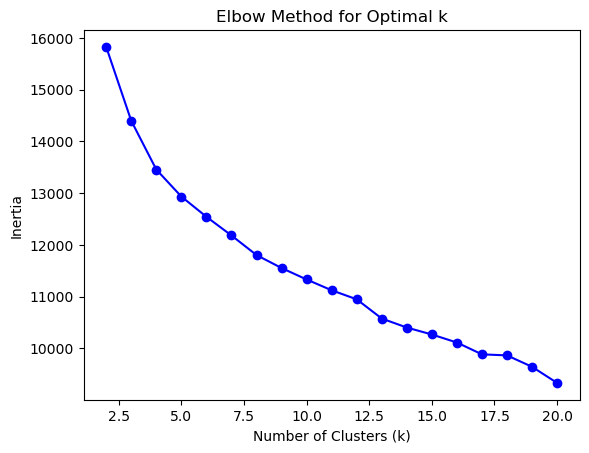

In [14]:
# Plot the inertia (within-cluster sum of squares) for each number of clusters
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [15]:
k = 10


In [16]:
# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)


/Users/rahulkandel/anaconda3/envs/itech7001/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [17]:
# Assign cluster labels to training set and validation set
train_clusters = kmeans.labels_
val_clusters = kmeans.predict(X_val)


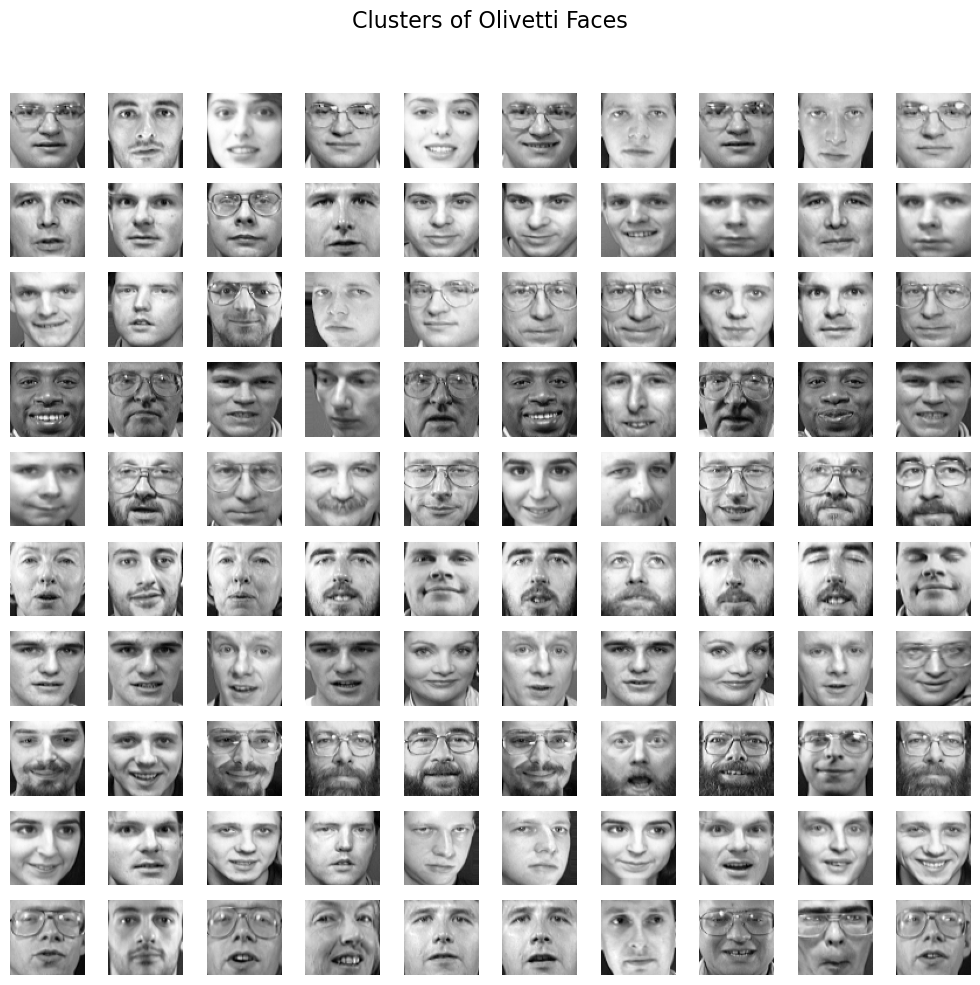

In [18]:
# Visualize the clusters
fig, axes = plt.subplots(k, 10, figsize=(10, k))
fig.suptitle('Clusters of Olivetti Faces', fontsize=16)

for i in range(k):
    cluster_indices = np.where(train_clusters == i)[0]
    for j in range(10):
        axes[i, j].imshow(X_train[cluster_indices[j]].reshape(64, 64), cmap='gray')
        axes[i, j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
